In [1]:
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
%load_ext autoreload
%autoreload 2
import time
tag= 'tmp' + str(int(time.time()))

### Effet de variations de paramètres cellulaires

Il est primordial de bien choisir les valeurs des paramètres cellulaires pour éviter que l'activité du réseau soit trop basse ou trop élevée. Cette expérience contrôle est nécessaire pour rester dans un régime d'activité où la manipulation des paramètres non cellulaires aura un effet observable sur l'activité du réseau.

Pour ce faire, le même procédé d'exploration utilisé pour le réseau feed-forward est effectué ici. Ainsi, l'effet de la variation de chacun des paramètres cellulaires sur le taux de décharge peut être observé. Nous rappelons que pour chaque paramètre étudié, plusieurs simulations du modèle sont lancés avec différentes valeurs du paramètre. Et, pour chaque simulation, le taux de décharge neuronal moyen de la population B est récupéré. Les résultats sont alors affichés dans une courbe du taux de décharge mesuré en fonction d'une variation d'un paramètre.

Les résultats obtenus vérifient bien le fait que les paramètres cellulaires sont bien choisis.

### Results

CSAConnector: libneurosim support not available in NEST.
Falling back on PyNN's default CSAConnector.
Please re-compile NEST using --with-libneurosim=PATH
------------  tau_m  -------------


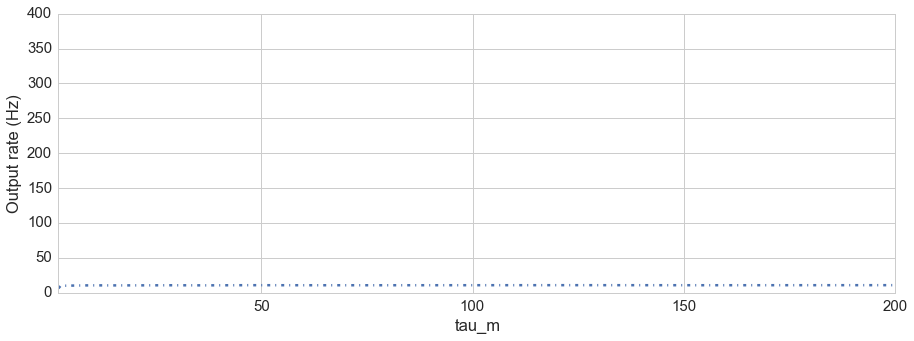

------------  tau_syn_E  -------------


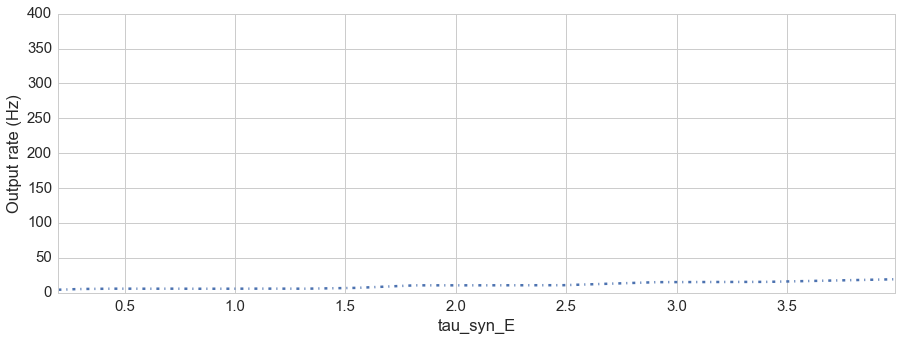

------------  tau_syn_I  -------------


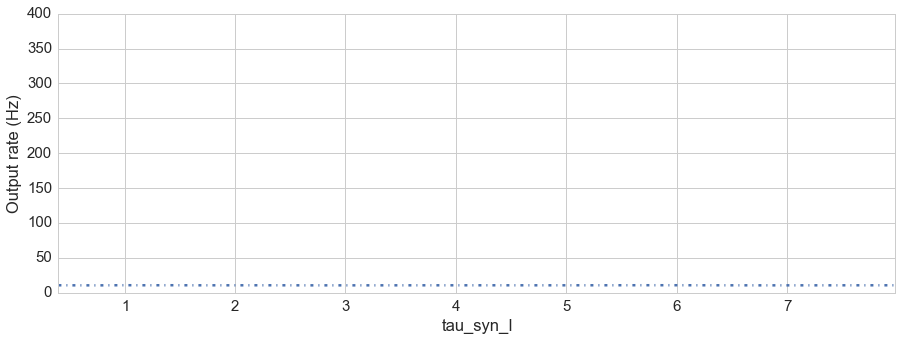

------------  e_rev_E  -------------


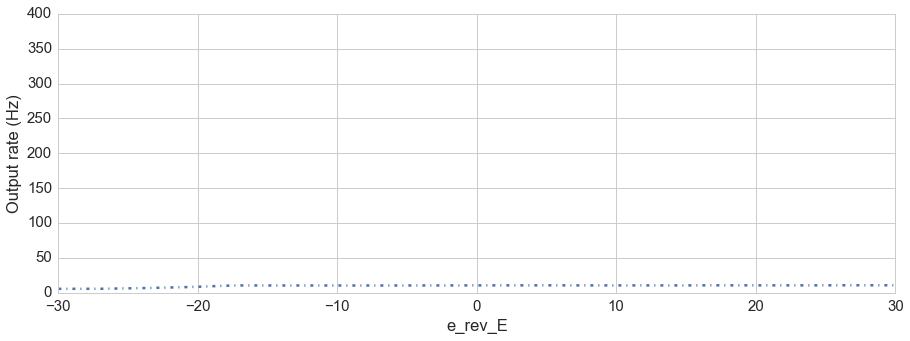

------------  e_rev_I  -------------


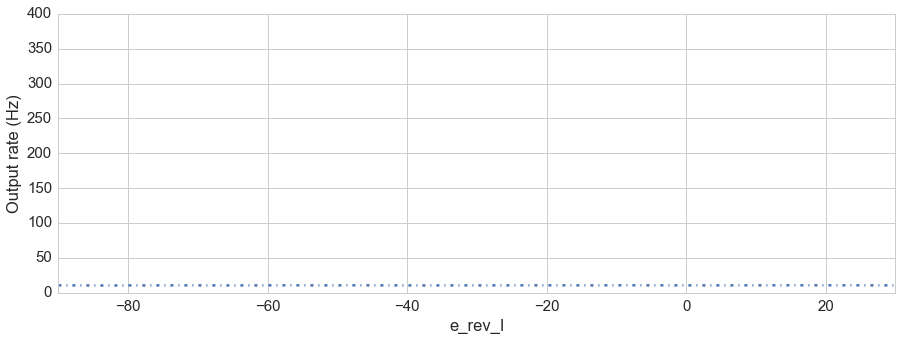

------------  tau_refrac  -------------


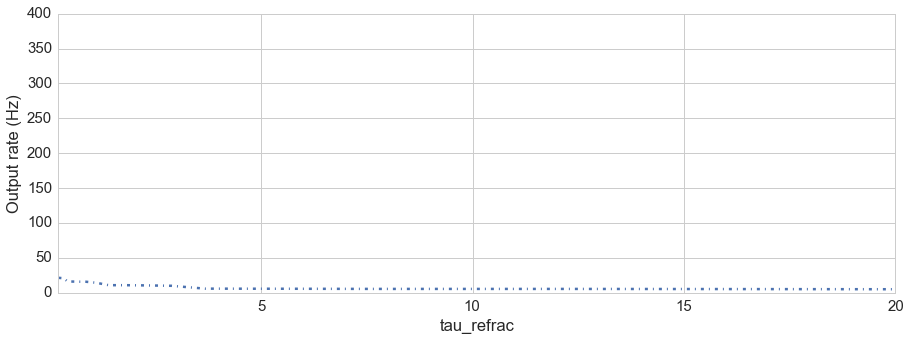

------------  v_rest  -------------


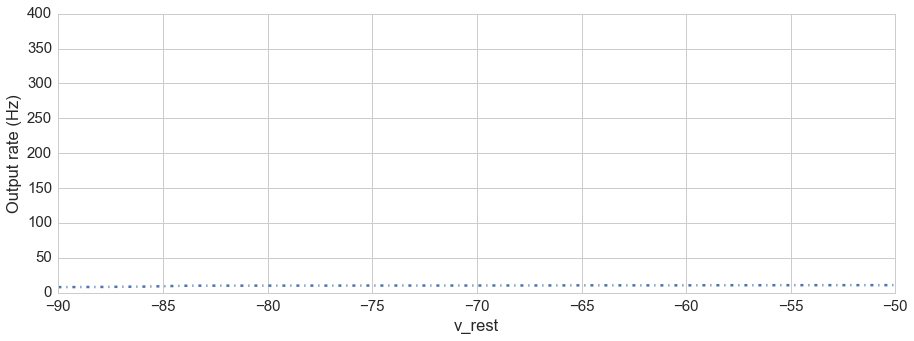

------------  v_reset  -------------


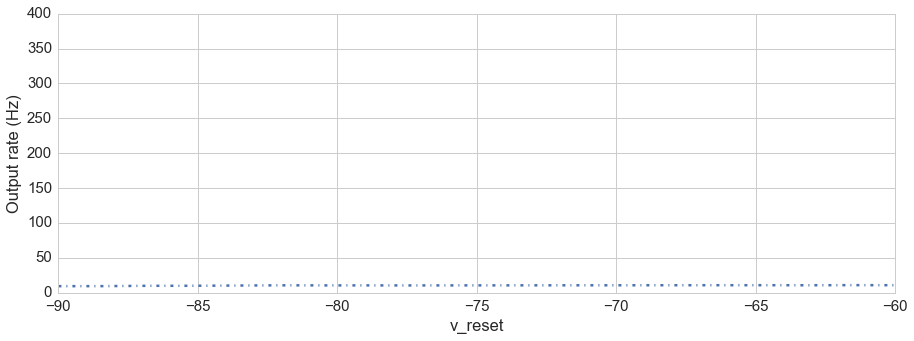

------------  v_thresh  -------------


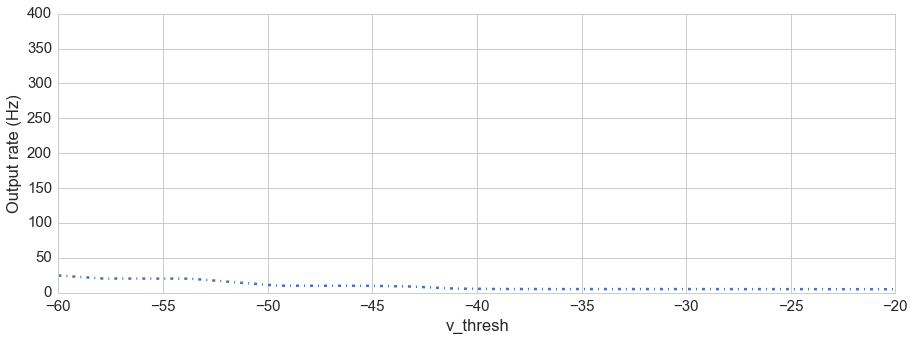

------------  cm  -------------


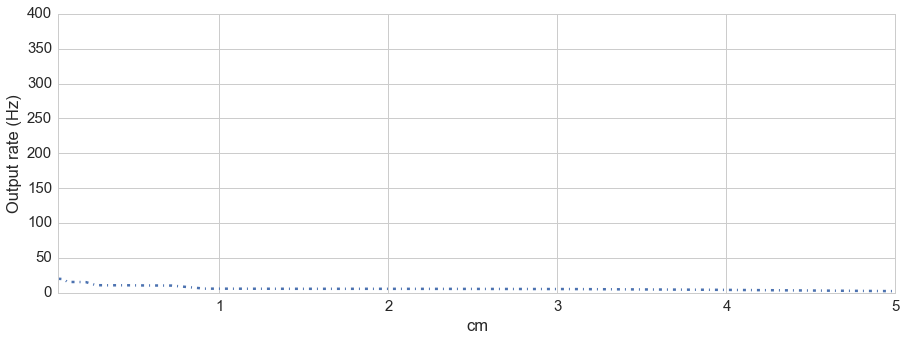

In [2]:
import numpy as np
from RRNN import RRNN

datapath_cell = '/tmp/OB-V1_data/RRNN_cell9' + tag
net = RRNN(ring=False, recurrent=False)

n_sim_each = 20
sim_params = net.sim_params
cell_params = net.cell_params
sim_list = [
            #('w_input_exc', np.linspace(0, 4, n_sim_each)),
            #('input_rate' , sim_params['input_rate']*np.logspace(-1, 1, n_sim_each)),
            #('syn_delay'  , sim_params['syn_delay']*np.logspace(-1, 1, n_sim_each)),
            ('tau_m'      , cell_params['tau_m']*np.logspace(-1., 1., n_sim_each)),
            ('tau_syn_E'  , cell_params['tau_syn_E']*np.logspace(-1, .3, n_sim_each)),
            ('tau_syn_I'  , cell_params['tau_syn_I']*np.logspace(-1, .3, n_sim_each)),
            ('e_rev_E'    , np.linspace(-30, 30, n_sim_each)),
            ('e_rev_I'    , np.linspace(-90, 30, n_sim_each)),
            ('tau_refrac' , cell_params['tau_refrac']*np.logspace(-1, 1, n_sim_each)),
            ('v_rest'     , np.linspace(-90, -50, n_sim_each)),
            ('v_reset'    , np.linspace(-90, -60, n_sim_each)),
            ('v_thresh'   , np.linspace(-60, -20, n_sim_each)),
            ('cm'         , cell_params['cm']*np.logspace(-1, 1, n_sim_each))
]
net.paramRole(sim_list, datapath=datapath_cell, semilog = False)